In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import cv2
from skimage import filters

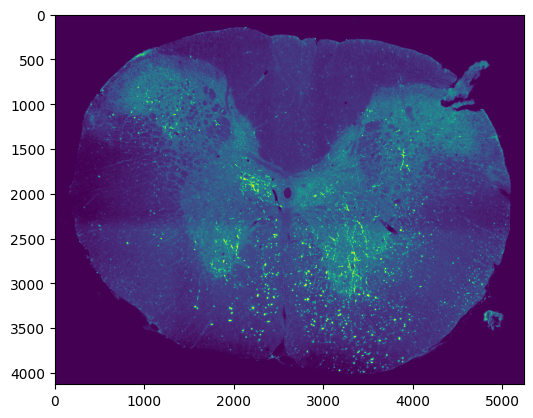

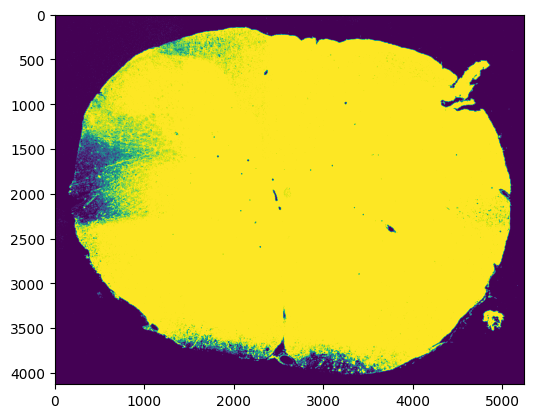

In [2]:
im = plt.imread("ims/C1-BJZ4.tiff")[:,:,0]
iniital_mask = im>10
plt.imshow(im)
plt.show()
plt.imshow(iniital_mask)
plt.show()

In [3]:
im = plt.imread("ims/C1-BJZ4.tiff")
median = cv2.medianBlur(im,65)[:,:,0]

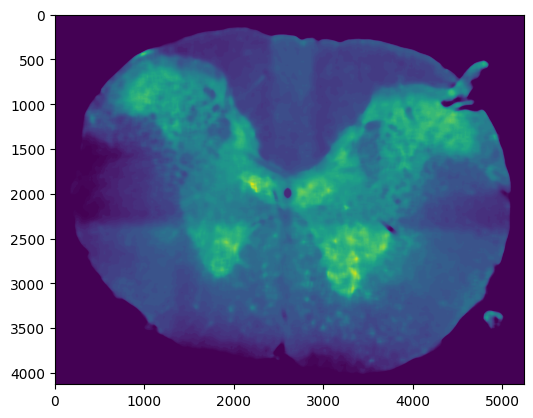

In [4]:
plt.imshow(median)

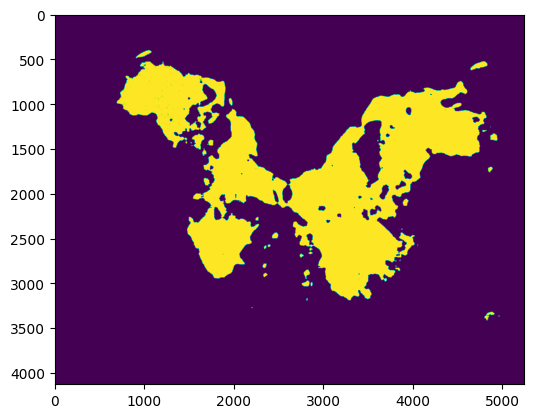

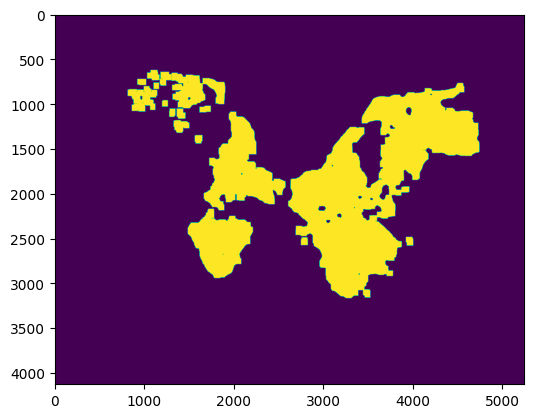

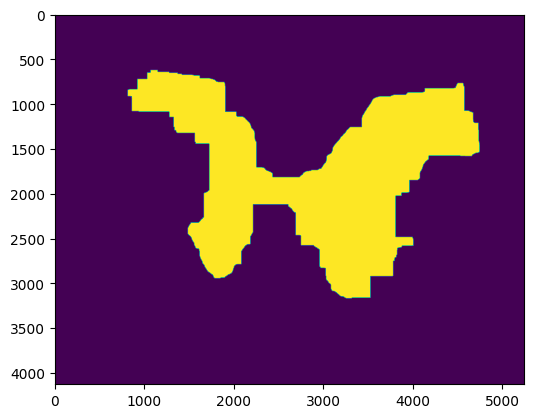

In [35]:
separated = median*iniital_mask
separated = separated[separated > 35]
th = filters.threshold_otsu(separated.flatten())

separated = median*iniital_mask
separated = separated>th

plt.imshow(separated)
plt.show()

kernel2 = np.ones((60, 60), np.uint8)
segmented_open = cv2.morphologyEx(separated.astype(np.uint8), cv2.MORPH_OPEN, kernel2)
plt.imshow(segmented_open)
plt.show()

kernel = np.ones((300,300),np.uint8)
segmented_closed = cv2.morphologyEx(segmented_open.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

plt.imshow(segmented_closed)
plt.show()



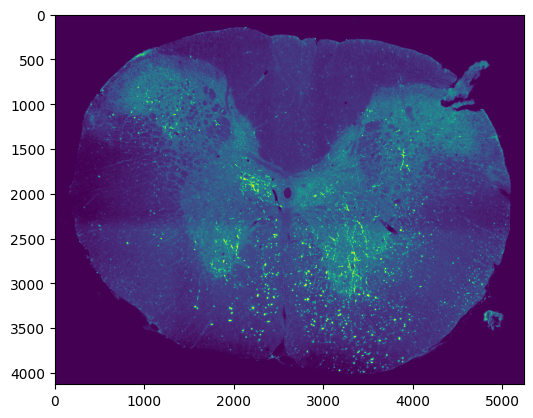

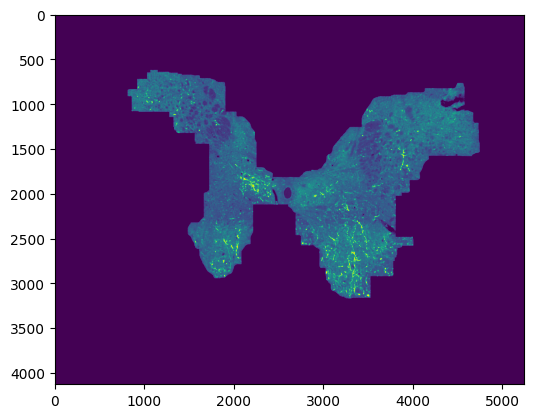

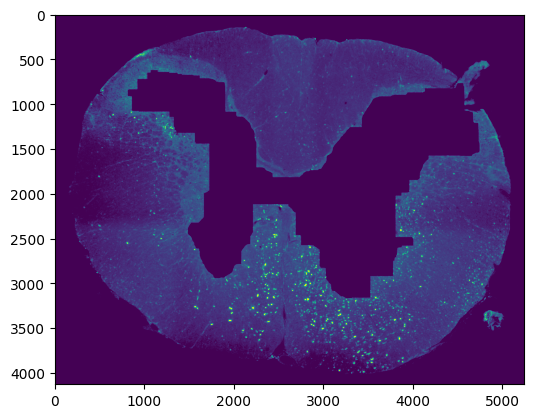

In [33]:
plt.imshow(im[:,:,0])
plt.show()

plt.imshow(im[:,:,0]*segmented_closed*iniital_mask)
plt.show()

plt.imshow(im[:,:,0]*(1-segmented_closed)*iniital_mask)
plt.show()